In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("data"))

['2015-building-energy-benchmarking.csv', '2016-building-energy-benchmarking.csv', 'clean-building-energy-benchmarking.csv', 'socrata_metadata_2015-building-energy-benchmarking.json', 'socrata_metadata_2016-building-energy-benchmarking.json']


In [2]:
raw = pd.read_csv("data/clean-building-energy-benchmarking.csv")
data = raw.copy()

In [3]:
data.head()

,BuildingType,DataYear,ENERGYSTARScore,GHGEmissionsIntensity,Neighborhood,NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,...,PType_Convenience Store without Gas Station,PType_Bar/Nightclub,PType_Food Sales,PType_Enclosed Mall,PType_Other - Technology/Science,PType_Fast Food Restaurant,EGrid_Electricity,EGrid_NaturalGas,EGrid_SteamUse,EGrid_OtherFuelUse
0,NonResidential,2015,65.0,2.64,DOWNTOWN,1.0,12.0,1,88434,0,...,0,0,0,0,0,0,1,1,1,0
1,NonResidential,2015,51.0,2.38,DOWNTOWN,1.0,11.0,2,88502,15064,...,0,0,0,0,0,0,1,1,0,0
2,NonResidential,2015,18.0,1.92,DOWNTOWN,1.0,41.0,3,961990,0,...,0,0,0,0,0,0,1,1,1,0
3,NonResidential,2015,1.0,31.38,DOWNTOWN,1.0,10.0,5,61320,0,...,0,0,0,0,0,0,1,1,1,0
4,NonResidential,2015,67.0,4.02,DOWNTOWN,1.0,18.0,8,107430,12460,...,0,0,0,0,0,0,1,1,0,0


### Prédiction des gaz à effets de serres

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = data.loc[:, (data.dtypes != object)]
df = df.dropna()

In [6]:
X = df.drop('SiteEnergyUseWN(kBtu)', axis=1)
y = df[['SiteEnergyUseWN(kBtu)']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_predicted = reg.predict(X_test)
print("Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predicted)))
print('R2 : %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 1503793.77
R2 : 0.99


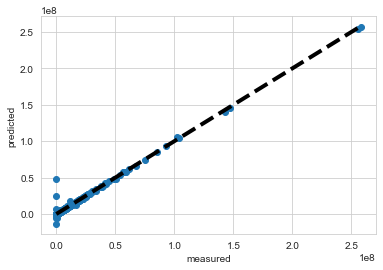

In [10]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("measured")
ax.set_ylabel("predicted")
plt.show()